In [1]:
from pyblock2.driver.core import DMRGDriver, SymmetryTypes, MPOAlgorithmTypes
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm

In [2]:
params={}
params['L'] = 10
params['t'] = 1
params['u'] = 1
params['mu'] = 0
params['NB_MAX'] = 3 # max n_boson per site
params['N_BOSON'] = 10
params['theta'], params['theta_list'] = np.pi/4, [0, np.pi/4, 3*np.pi/4, np.pi/2, np.pi]

driver = DMRGDriver(scratch="./tmp", symm_type=SymmetryTypes.SAny|SymmetryTypes.CPX, n_threads=4)

driver.set_symmetry_groups("U1")
Q = driver.bw.SX

In [3]:
# [Part A] Set states and matrix representation of operators in local Hilbert space
site_basis, site_ops = [], []
params['theta'] = 0
for k in range(params['L']):
    basis = [(Q(i), 1) for i in range(params['NB_MAX'] + 1)] 
    ops = {
        "": np.identity(params['NB_MAX'] + 1),                           # identity
        "C": np.diag(np.sqrt(np.arange(1, params['NB_MAX'] + 1)), k=-1), # b+
        "D": np.diag(np.sqrt(np.arange(1, params['NB_MAX'] + 1)), k=1),  # b
        "N": np.diag(np.arange(0, params['NB_MAX'] + 1), k=0),           # particle number
        "A": np.diag(np.sqrt(np.arange(1, params['NB_MAX'] + 1))*np.exp(1j * params['theta'] * np.arange(params['NB_MAX'])), k=-1), # A+_withPhase  
        "B": np.diag(np.sqrt(np.arange(1, params['NB_MAX'] + 1))*np.exp(-1j * params['theta'] * np.arange(params['NB_MAX'])), k=1), # A_withPhase  
    }
    site_basis.append(basis)
    site_ops.append(ops)

# First excitation gap as a function of J

In [5]:
params['u'] = 1
params['t_list'] = np.arange(0.01, 1, 0.1)
gaps = []
colors1 = plt.cm.Reds(np.linspace(0.5, 0.95, len(params['theta_list'])))
for t in params['t_list']:
    # [Part B] Set Hamiltonian terms
    params['t'] = t
    driver.initialize_system(n_sites=params['L'], vacuum=Q(0), target=Q(params['N_BOSON']), hamil_init=False)
    driver.ghamil = driver.get_custom_hamiltonian(site_basis, site_ops)
    b = driver.expr_builder()
    
    # b.add_term("ADCB", np.array([[i, i+1, i+1, i] for i in range(params['L']-1)]).flatten(), -params['t'])
    b.add_term("AD", np.array([[i, i+1] for i in range(params['L']-1)]).flatten(), -params['t'])
    b.add_term("CB", np.array([[i+1, i] for i in range(params['L']-1)]).flatten(), -params['t'])
    b.add_term("N", np.array(np.arange(params['L'])), -(params['mu'] + params['u'] / 2))
    b.add_term("NN", np.repeat(np.arange(params['L']), 2), params['u'] / 2)

    # [Part C] Perform DMRG
    mpo = driver.get_mpo(b.finalize(adjust_order=True, fermionic_ops=""), algo_type=MPOAlgorithmTypes.FastBipartite)
    mps = driver.get_random_mps(tag="KET", bond_dim=50, nroots=2)
    energy = driver.dmrg(mpo, mps, n_sweeps=10, bond_dims=[50] * 4 + [100] * 4,
        noises=[1e-4] * 4 + [1e-5] * 4 + [0], thrds=[1e-10] * 8, dav_max_iter=30, iprint=0)
    gaps.append(energy[1] - energy[0])

plt.plot(params['t_list'], gaps, marker='o', label=f"{theta:.2f}", color=colors1[i])
plt.xlabel('J')
plt.ylabel('First Excitation Energy Gap')
plt.title('First Excitation Energy Gap vs. Hopping Parameter J')
plt.grid(True)
plt.legend()
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
plt.show()

NameError: name 'gaps' is not defined

In [29]:
params['N_BOSON'], params['L'], params['NB_MAX'] = 3, 3, 2
params['u'] = 1
params['mu'] = 0
params['t_list'] = np.arange(0, 1, 0.1)
entropy  =  []


params['t'] = 1
params['u'] = 1
params['mu'] = 0
params['theta'], params['theta_list'] = np.pi/4, [0, np.pi/4, 3*np.pi/4, np.pi/2, np.pi]

driver = DMRGDriver(scratch="./tmp", symm_type=SymmetryTypes.SAny|SymmetryTypes.CPX, n_threads=4)

driver.set_symmetry_groups("U1")
Q = driver.bw.SX

# [Part A] Set states and matrix representation of operators in local Hilbert space
site_basis, site_ops = [], []
for k in range(params['L']):
    basis = [(Q(i), 1) for i in range(params['NB_MAX'] + 1)] 
    ops = {
        "": np.identity(params['NB_MAX'] + 1),                           # identity
        "C": np.diag(np.sqrt(np.arange(1, params['NB_MAX'] + 1)), k=-1), # b+
        "D": np.diag(np.sqrt(np.arange(1, params['NB_MAX'] + 1)), k=1),  # b
        "N": np.diag(np.arange(0, params['NB_MAX'] + 1), k=0),           # particle number
        "A": np.diag(np.sqrt(np.arange(1, params['NB_MAX'] + 1))*np.exp(1j * params['theta'] * np.arange(params['NB_MAX'])), k=-1), # A+_withPhase  
        "B": np.diag(np.sqrt(np.arange(1, params['NB_MAX'] + 1))*np.exp(-1j * params['theta'] * np.arange(params['NB_MAX'])), k=1), # A_withPhase  
    }
    site_basis.append(basis)
    site_ops.append(ops)

for t in params['t_list']:
    # [Part B] Set Hamiltonian terms
    params['t'] = t
    driver.initialize_system(n_sites=params['L'], vacuum=Q(0), target=Q(params['N_BOSON']), hamil_init=False)
    driver.ghamil = driver.get_custom_hamiltonian(site_basis, site_ops)
    b = driver.expr_builder()
    
    b.add_term("AD", np.array([[i, i+1] for i in range(params['L']-1)]).flatten(), -params['t'])
    b.add_term("CB", np.array([[i+1, i] for i in range(params['L']-1)]).flatten(), -params['t'])
    b.add_term("N", np.array(np.arange(params['L'])), -(params['mu'] + params['u'] / 2))
    b.add_term("NN", np.repeat(np.arange(params['L']), 2), params['u'] / 2)

    # [Part C] Perform DMRG
    mpo = driver.get_mpo(b.finalize(adjust_order=True, fermionic_ops=""), algo_type=MPOAlgorithmTypes.FastBipartite)
    mps = driver.get_random_mps(tag="KET", bond_dim=50, nroots=1)
    energy = driver.dmrg(mpo, mps, n_sweeps=10, bond_dims=[50] * 4 + [100] * 4,
        noises=[1e-4] * 4 + [1e-5] * 4 + [0], thrds=[1e-10] * 8, dav_max_iter=30, iprint=0)
    entropy.append(driver.get_bipartite_entanglement()[0])

In [31]:
params['N_BOSON'], params['L'], params['NB_MAX'] = 3, 3, 2
params['u'] = 1
params['mu'] = 0
params['t_list'] = np.arange(0, 1, 0.1)
entropy  =  []


params['t'] = 1
params['u'] = 1
params['mu'] = 0
params['theta'], params['theta_list'] = 3*np.pi/4, [0, np.pi/4, 3*np.pi/4, np.pi/2, np.pi]

driver = DMRGDriver(scratch="./tmp", symm_type=SymmetryTypes.SAny|SymmetryTypes.CPX, n_threads=4)

driver.set_symmetry_groups("U1")
Q = driver.bw.SX

# [Part A] Set states and matrix representation of operators in local Hilbert space
site_basis, site_ops = [], []
for k in range(params['L']):
    basis = [(Q(i), 1) for i in range(params['NB_MAX'] + 1)] 
    ops = {
        "": np.identity(params['NB_MAX'] + 1),                           # identity
        "C": np.diag(np.sqrt(np.arange(1, params['NB_MAX'] + 1)), k=-1), # b+
        "D": np.diag(np.sqrt(np.arange(1, params['NB_MAX'] + 1)), k=1),  # b
        "N": np.diag(np.arange(0, params['NB_MAX'] + 1), k=0),           # particle number
        "A": np.diag(np.sqrt(np.arange(1, params['NB_MAX'] + 1))*np.exp(1j * params['theta'] * np.arange(params['NB_MAX'])), k=-1), # A+_withPhase  
        "B": np.diag(np.sqrt(np.arange(1, params['NB_MAX'] + 1))*np.exp(-1j * params['theta'] * np.arange(params['NB_MAX'])), k=1), # A_withPhase  
    }
    site_basis.append(basis)
    site_ops.append(ops)

for t in params['t_list']:
    # [Part B] Set Hamiltonian terms
    params['t'] = t
    driver.initialize_system(n_sites=params['L'], vacuum=Q(0), target=Q(params['N_BOSON']), hamil_init=False)
    driver.ghamil = driver.get_custom_hamiltonian(site_basis, site_ops)
    b = driver.expr_builder()
    
    b.add_term("AD", np.array([[i, i+1] for i in range(params['L']-1)]).flatten(), -params['t'])
    b.add_term("CB", np.array([[i+1, i] for i in range(params['L']-1)]).flatten(), -params['t'])
    b.add_term("N", np.array(np.arange(params['L'])), -(params['mu'] + params['u'] / 2))
    b.add_term("NN", np.repeat(np.arange(params['L']), 2), params['u'] / 2)

    # [Part C] Perform DMRG
    mpo = driver.get_mpo(b.finalize(adjust_order=True, fermionic_ops=""), algo_type=MPOAlgorithmTypes.FastBipartite)
    mps = driver.get_random_mps(tag="KET", bond_dim=50, nroots=1)
    energy = driver.dmrg(mpo, mps, n_sweeps=10, bond_dims=[50] * 4 + [100] * 4,
        noises=[1e-4] * 4 + [1e-5] * 4 + [0], thrds=[1e-10] * 8, dav_max_iter=30, iprint=0)
    entropy.append(driver.get_bipartite_entanglement()[0])
print(f'entropy from Dmrg = {entropy}')

entropy from Dmrg = [0.0, 0.17037038883589162, 0.37558406299209823, 0.5131640135481491, 0.6019244524423396, 0.6616481157954319, 0.7037881973895288, 0.734772161094641, 0.7583464086330055, 0.7767978715005304]


# Expectation of $<a^{+}a>$ for different values of J

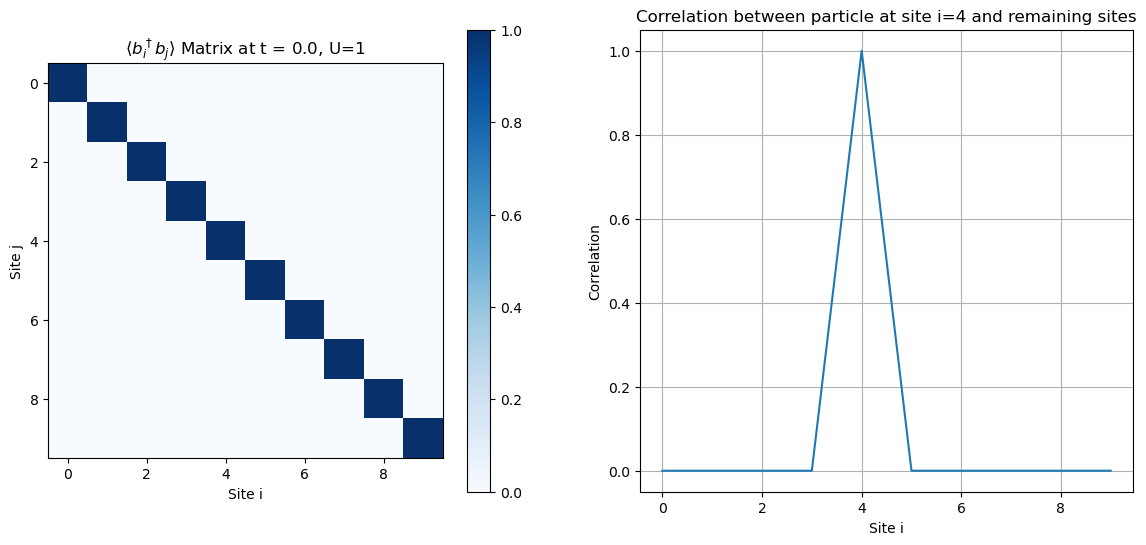

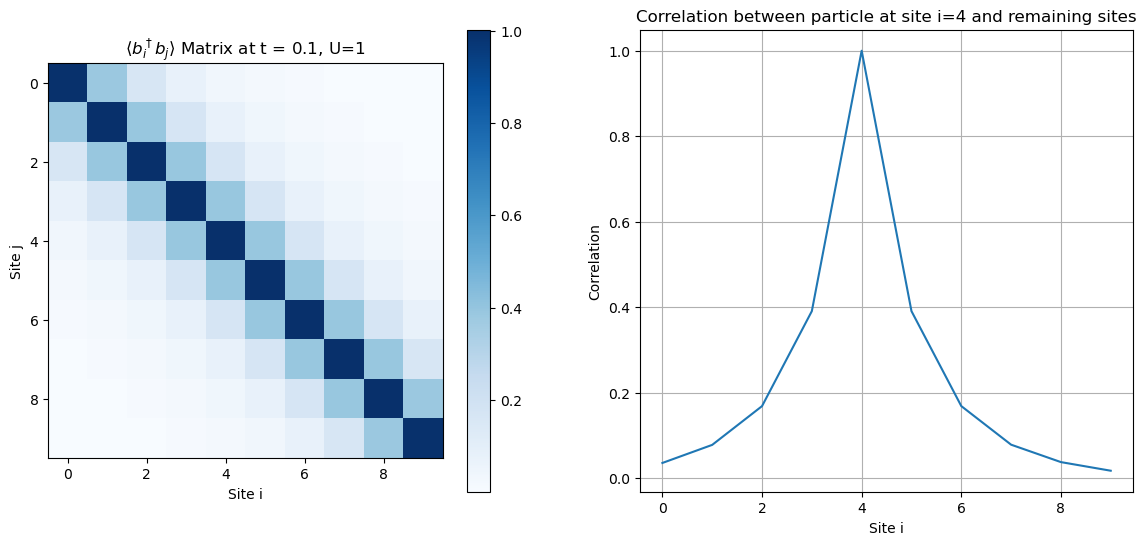

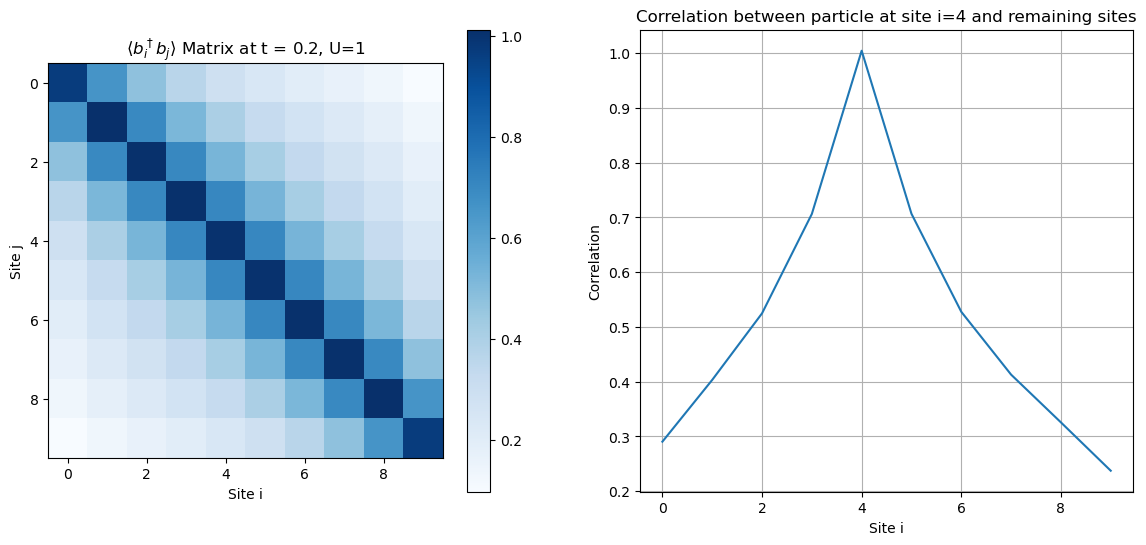

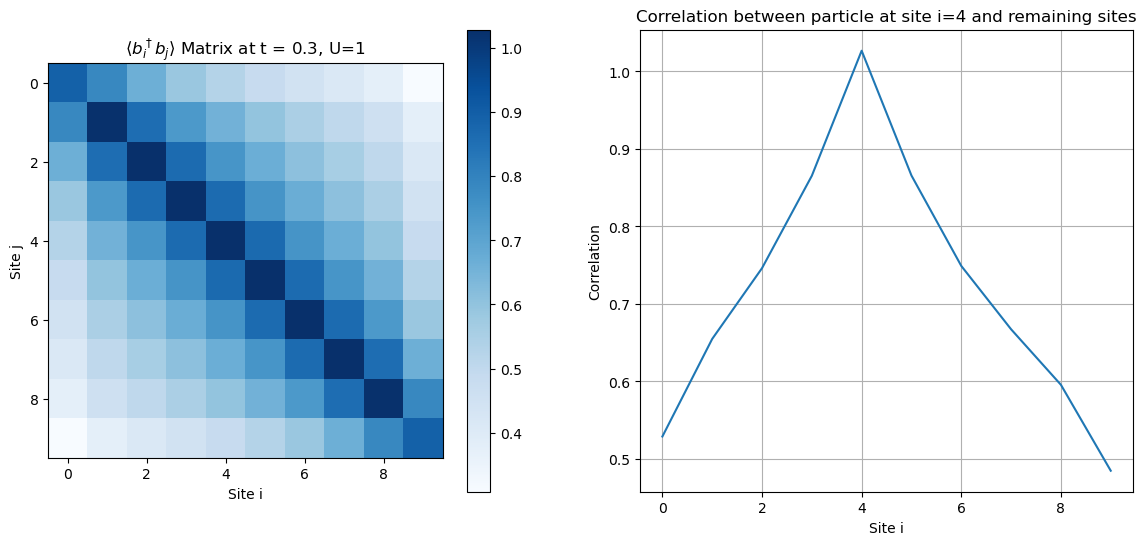

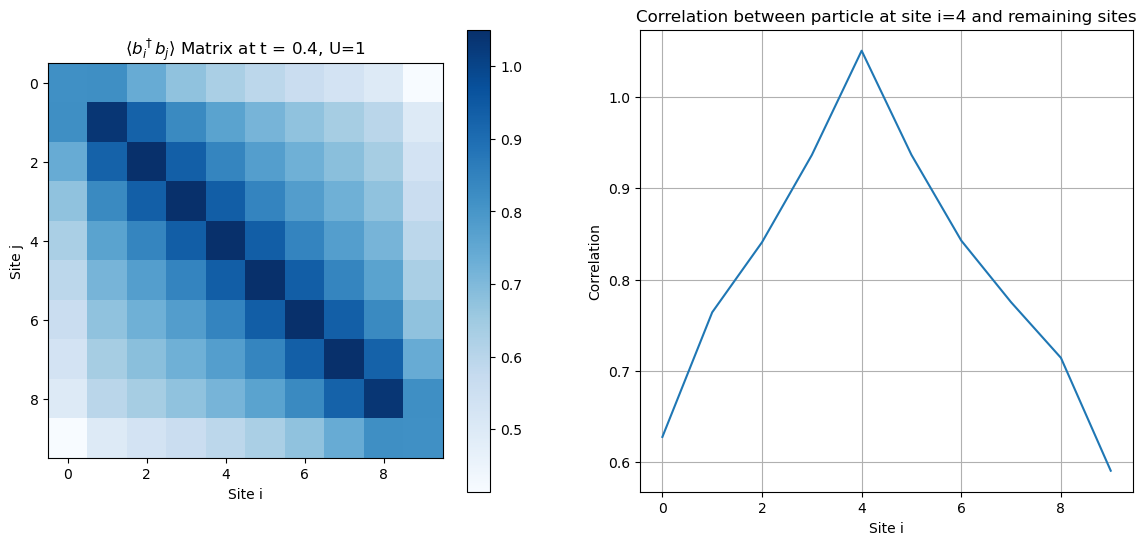

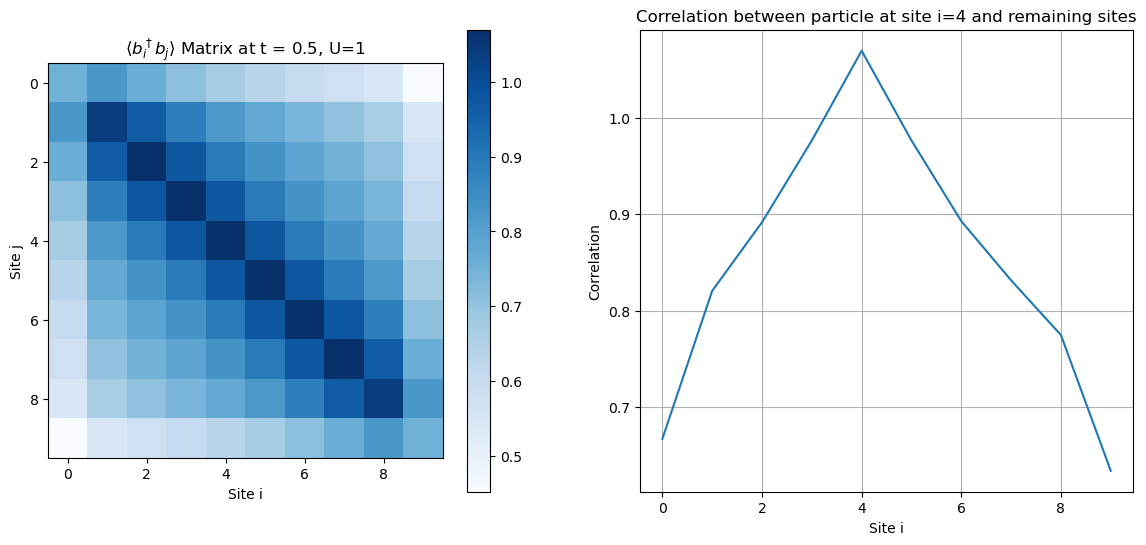

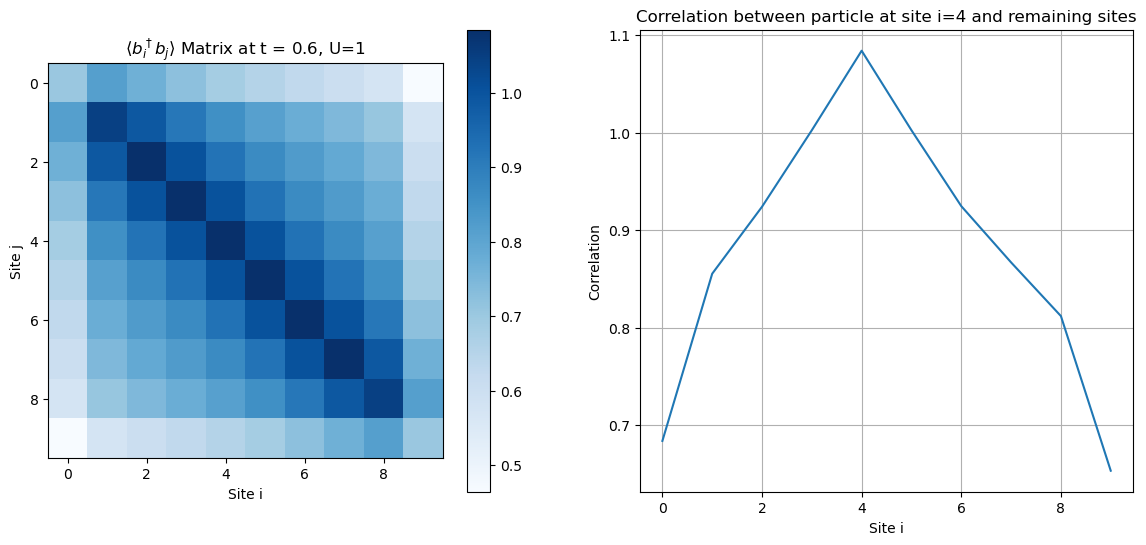

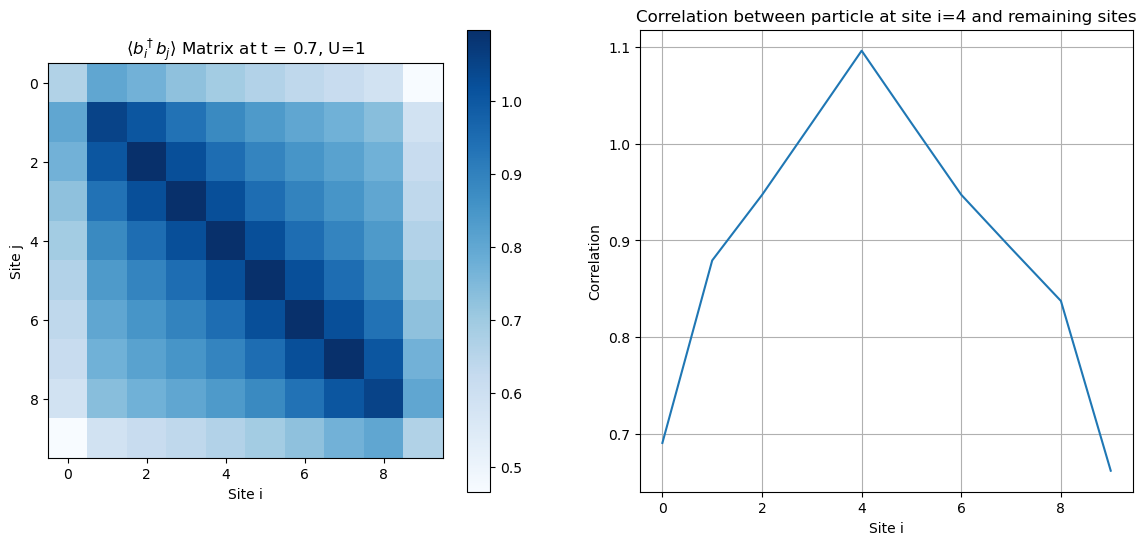

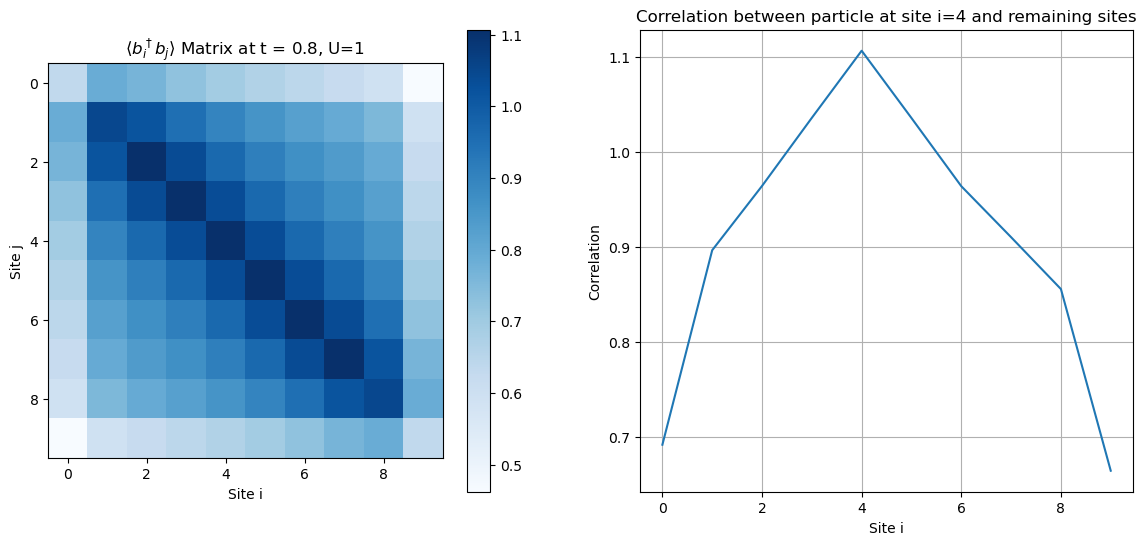

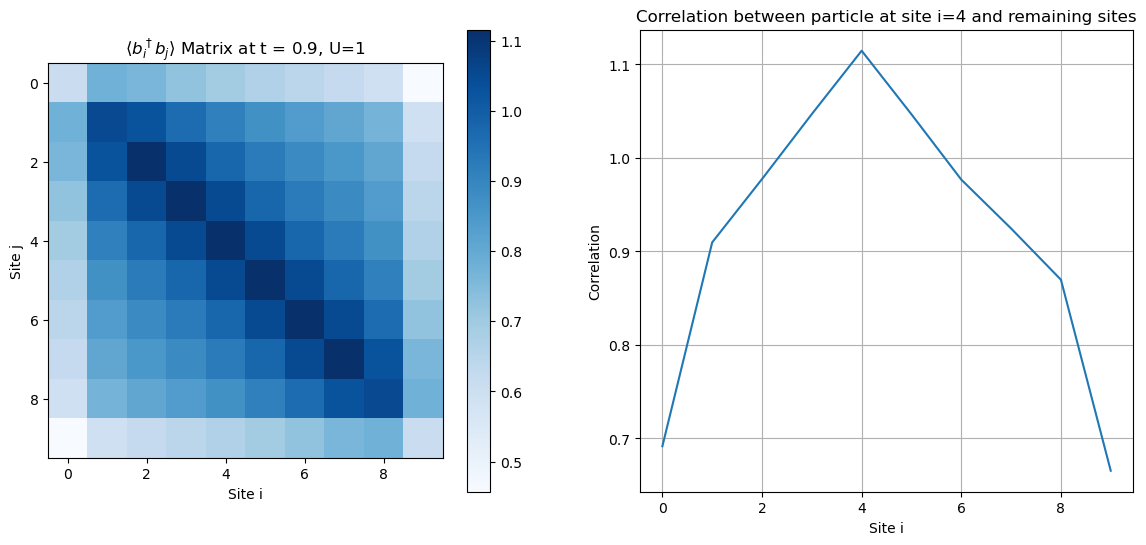

In [46]:
for t in params['t_list']:
    # [Part B] Set Hamiltonian terms
    params['t'] = t
    driver.initialize_system(n_sites=params['L'], vacuum=Q(0), target=Q(params['N_BOSON']), hamil_init=False)
    driver.ghamil = driver.get_custom_hamiltonian(site_basis, site_ops)
    b = driver.expr_builder()
    
    b.add_term("CD", np.array([[i, i+1] for i in range(params['L']-1)]).flatten(), -params['t']*np.exp(1j*params['theta']))
    b.add_term("CD", np.array([[i+1, i] for i in range(params['L']-1)]).flatten(), -params['t']*np.exp(-1j*params['theta']))
    b.add_term("N", np.array(np.arange(params['L'])), -(params['mu'] + params['u'] / 2))
    b.add_term("NN", np.repeat(np.arange(params['L']), 2), params['u'] / 2)

    # [Part C] Perform DMRG
    mpo = driver.get_mpo(b.finalize(adjust_order=True, fermionic_ops=""), algo_type=MPOAlgorithmTypes.FastBipartite)
    mps = driver.get_random_mps(tag="KET", bond_dim=50, nroots=1)
    energy = driver.dmrg(mpo, mps, n_sweeps=10, bond_dims=[50] * 4 + [100] * 4,
        noises=[1e-4] * 4 + [1e-5] * 4 + [0], thrds=[1e-10] * 8, dav_max_iter=30, iprint=0)
    entropy.append(driver.get_bipartite_entanglement()[0])

    # [Part C] Perform DMRG
    mpo = driver.get_mpo(b.finalize(adjust_order=True, fermionic_ops=""), algo_type=MPOAlgorithmTypes.FastBipartite)
    mps = driver.get_random_mps(tag="KET", bond_dim=50, nroots=1)
    energy = driver.dmrg(mpo, mps, n_sweeps=10, bond_dims=[50] * 4 + [100] * 4,
        noises=[1e-4] * 4 + [1e-5] * 4 + [0], thrds=[1e-10] * 8, dav_max_iter=30, iprint=0)

    # Calculating Expectation Value of Hopping Parameter
    hop_exp_val = np.zeros((params['L'], params['L']))
    
    for i in range(params['L']):
        for j in range(i, params['L']):
            b = driver.expr_builder()
            b.add_term("CD", np.array([i, j]), 1)  # Hopping operator between i and j            
            hop_mpo = driver.get_mpo(b.finalize(adjust_order=True, fermionic_ops=""), algo_type=MPOAlgorithmTypes.FastBipartite)
            hop_exp_val[i, j] = driver.expectation(mps, hop_mpo, mps)
            hop_exp_val[j, i] = hop_exp_val[i, j]  

    fig, axs = plt.subplots(1, 2, figsize=(14, 6))

    im = axs[0].imshow(hop_exp_val, cmap="Blues")
    axs[0].set_xlabel('Site i')
    axs[0].set_ylabel('Site j')
    axs[0].set_title(f'$\\langle b_i^\\dagger b_j \\rangle$ Matrix at t = {t:.1f}, U={params["u"]}')
    fig.colorbar(im, ax=axs[0])

    # Second subplot for the correlation plot
    middle_index = (params['L'] - 1) // 2
    correlation_rate = hop_exp_val[middle_index, :]
    axs[1].plot(list(range(params['L'])), correlation_rate)
    axs[1].set_xlabel('Site i')
    axs[1].set_ylabel('Correlation')
    axs[1].set_title(f'Correlation between particle at site i={middle_index} and remaining sites')
    axs[1].grid(True)
    plt.show()